# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto: el departamento comercial requeriré saber cuál de las dos tarifas  genera más ganancias, la empresa de telecomunicaciones Megaline con el fin de ajustar el presupuesto destinado para publicidad pero también muestra que plan es mejor para la organización, ver porque uno de los dos no y ver la oportunidad de mejora de que hacer para genere más ingresoa tales como promociones, descuentos
Las acciones que realizare:
a) Cargar los DataFrames observar que cumplan con los estandares los encabezados, separador correcto, cumpla las coolumnas con la estructura snake_case, el uso correcto de munusculas en las variables
b)Observar cada DataFrame no tenga duplicados, ni valores ausentes, cada variable este correcta fechas, conversion de unidades que nos facilite manipular nuestros datos
c)Unir los datos que requiero de los distintos DataFrame para crear una tabla itermedia, creando las columnas que requiero 
d) Realizar graficos necesarios para comprobar los datos obtenidos
e) Aplicar la estadistica descriptiva de los servicios de internet, mensajes y llamadas
f) Prueba de hipotesis con el fin de que plan genera mas ingresos

# Tabla de contenido
1. [Incializacion](#inicializacion)
2. [Cargar datos](#cargar-datos)
3. [Preparar los datos](#preparar-los-datos)
4. [Tarifas](#tarifas)
5. [Corregir datos](#correguir-datos)
6. [Enriquecer datos](#enriquecer-datos)
7. [Usuario](#usuarios)
- 7.1 [Correguir los datos](#correguir-los-datos)
- 7.2 [Enriquecer los datos](#enriquecer-los-datos)
8. [Llamadas](#llamadas)
- 8.1 [Corregir datos](#correguir-los-datos)
- 8.2 [Enriquecer los datos](#Enriquecer-los-datos)
9. [Mensajes](#mensajes)
- 9.1 [correguir los datos](#correguir-los-datos)
- 9.2 [Enriquecer los datos](#enriquecer-los-datos)
10. [Internet](#internet)
- 10.1 [Enriquecer los datos](#enriquecer-los-datos)
11. [Estudiar las condiciones las tarifas](#estudiar-las-condiciones-de-las-tarifas)
12. [Agregar datos por usuario](#agregar-datos-por-usuario)
13. [Estudia el comportamiento por usuario](#estudia-el-comportamiento-por-usuario)
- 13.1 [Llamadas](#llamadas)
- 13.2 [Mensajes](#mensajes)
- 13.3 [Internet](#internet)
14. [Ingreso](#ingreso)
15. [Prueba las hipotesis estadisticas](#prueba-las-hipotesis-estadisticas)
16. [Conclsuiones general](#conclsuion-general)



## Inicialización

In [238]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st



## Cargar datos

In [177]:
# Carga los archivos de datos en diferentes DataFrames
df_calls= pd.read_csv('megaline_calls.csv', header=0)
df_internet = pd.read_csv('megaline_internet.csv', header= 0)
df_messages = pd.read_csv('megaline_messages.csv', header = 0)
df_plans = pd.read_csv('megaline_plans.csv', header = 0)
df_users = pd.read_csv('megaline_users.csv', header = 0)


## Preparar los datos

## Tarifas

In [178]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_plans))




Primera filas:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 n

Los datos a correguir es convertir mb a gb para evitar confunsion a la hora de aplicar funciones y esos mismos valores convertirlos de float a entero

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [179]:
df_plans['gb_per_month_included'] = (df_plans['mb_per_month_included'] /1024)
df_plans= df_plans.drop(columns=['mb_per_month_included'])
df_plans = df_plans.reset_index(drop=True)
print(df_plans)

   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                   15.0  
1             0.01            0.01  ultimate                   30.0  


## Enriquecer los datos

In [180]:
df_plans['gb_per_month_included'] =df_plans['gb_per_month_included'].astype(int)
print(df_plans)

   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                     15  
1             0.01            0.01  ultimate                     30  


## Usuarios/as

In [181]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_users))




Primera filas:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2  

In [182]:
# Imprime una muestra de datos para usuarios
duplicate_name= df_users.duplicated(subset=['first_name', 'last_name']).sum()
print('El total de duplicados en las columnas first_name y last_name son:', duplicate_name)
duplicate_user= df_users.duplicated(subset=['user_id']).sum()
print('El total de duplicados de la columna user_id es:', duplicate_user)



El total de duplicados en las columnas first_name y last_name son: 0
El total de duplicados de la columna user_id es: 0


La columna churn_date y reg_date requieren cambiar su formato a tipo fecha, aparte churn_date tiene 466 valores ausentes que para emjorar el codigo se ponen una fecha que no a pasado ya que no afecta nuestros datos ya que es como si el usuario esta activo

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [183]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

In [184]:
df_users['churn_date'] = df_users['churn_date'].fillna(pd.Timestamp('2099-01-01'))
print(df_users.head())
print()
df_users.info()

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate 2099-01-01  
1 2018-08-13      surf 2099-01-01  
2 2018-10-21      surf 2099-01-01  
3 2018-01-28      surf 2099-01-01  
4 2018-05-23      surf 2099-01-01  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   l

## Llamadas

In [185]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_calls))



Primera filas:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

El total de valores ausentes es:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

El total de valores duplicados es:
0
None


La columna call_date requiere cambirse a tipo fecha y la columna duration requiere que el aunque se pase por decimas se paso al entero siguiente y se redondea

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [186]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [187]:
df_calls['rounded_duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls['month'] = df_calls['call_date'].dt.month
print(df_calls.head())

         id  user_id  call_date  duration  rounded_duration  month
0   1000_93     1000 2018-12-27      8.52                 9     12
1  1000_145     1000 2018-12-27     13.66                14     12
2  1000_247     1000 2018-12-27     14.48                15     12
3  1000_309     1000 2018-12-28      5.76                 6     12
4  1000_380     1000 2018-12-30      4.22                 5     12


## Mensajes

In [188]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_messages))




Primera filas:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

El total de valores ausentes es:
id              0
user_id         0
message_date    0
dtype: int64

El total de valores duplicados es:
0
None


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

La columna message_date requiere cambiar su tipo de dato a fecha para mejorar manupulacion

### Corregir los datos

In [189]:
duplicate_id= df_messages.duplicated(subset=['id']).sum()
print('El total de duplicados de la columna id es:', duplicate_id)
print()
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

El total de duplicados de la columna id es: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [190]:
df_messages['month'] = df_messages['message_date'].dt.month
print(df_messages.head())

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [191]:
# Imprime la información general/resumida sobre el DataFrame de internet
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_internet))




Primera filas:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

El total de valores ausentes es:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

El total de valores duplicados es:
0
None


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

La columna mb_used requiere comversion de unidades a gb finalizando con su redondeo al siguiente entero la empresa tanto gb como minutos cobrara demas aunque se pase por un decima, la columna session_date pasa a tipo fecha

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [192]:
duplicate_id= df_internet.duplicated(subset=['id']).sum()
print('El total de duplicados de la columna id es:', duplicate_id)
print()
df_internet['gb_used'] = (df_internet['mb_used'] /1024)
df_internet['rounded_gb'] = np.ceil(df_internet['gb_used']).astype(int)
df_internet= df_internet.drop(columns=['mb_used'])
df_internet = df_internet.reset_index(drop=True)
print(df_internet)



El total de duplicados de la columna id es: 0

              id  user_id session_date   gb_used  rounded_gb
0        1000_13     1000   2018-12-29  0.087754           1
1       1000_204     1000   2018-12-31  0.000000           0
2       1000_379     1000   2018-12-28  0.644922           1
3       1000_413     1000   2018-12-26  0.264639           1
4       1000_442     1000   2018-12-27  0.859590           1
...          ...      ...          ...       ...         ...
104820  1499_215     1499   2018-10-20  0.212949           1
104821  1499_216     1499   2018-12-30  0.297578           1
104822  1499_217     1499   2018-09-22  0.285889           1
104823  1499_218     1499   2018-12-07  0.000000           0
104824  1499_219     1499   2018-12-24  0.740537           1

[104825 rows x 5 columns]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [193]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()
print()
df_internet['month'] = df_internet['session_date'].dt.month
print(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
 4   rounded_gb    104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB

         id  user_id session_date   gb_used  rounded_gb  month
0   1000_13     1000   2018-12-29  0.087754           1     12
1  1000_204     1000   2018-12-31  0.000000           0     12
2  1000_379     1000   2018-12-28  0.644922           1     12
3  1000_413     1000   2018-12-26  0.264639           1     12
4  1000_442     1000   2018-12-27  0.859590           1     12


## Estudiar las condiciones de las tarifas

In [194]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans.head())

   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                     15  
1             0.01            0.01  ultimate                     30  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [195]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
fact_call = df_calls.groupby(['user_id', 'month']). agg({'rounded_duration' : ['count']})
fact_call.columns = ['total_calls']
fact_call.reset_index(inplace=True)
print(fact_call)

      user_id  month  total_calls
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [196]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

fact_call = df_calls.groupby(['user_id', 'month']). agg({'rounded_duration' : ['sum', 'count']})
fact_call.columns = ['minutes_used', 'total_calls']
fact_call.reset_index(inplace=True)
print(fact_call)

      user_id  month  minutes_used  total_calls
0        1000     12           124           16
1        1001      8           182           27
2        1001      9           315           49
3        1001     10           393           65
4        1001     11           426           64
...       ...    ...           ...          ...
2253     1498     12           339           39
2254     1499      9           346           41
2255     1499     10           385           53
2256     1499     11           308           45
2257     1499     12           496           65

[2258 rows x 4 columns]


In [197]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
fact_messages = df_messages.groupby(['user_id', 'month']). agg({'id' : ['count']})
fact_messages.columns = ['total_messages']
fact_messages.reset_index(inplace=True)
print(fact_messages)




      user_id  month  total_messages
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [198]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
fact_internet = df_internet.groupby(['user_id', 'month']). agg({'gb_used' : ['sum']})
fact_internet.columns = ['gb_used_user']
fact_internet['gb_used_user_rounded'] = np.ceil(fact_internet['gb_used_user']).astype(int)
fact_internet.reset_index(inplace=True)
print(fact_internet)

      user_id  month  gb_used_user  gb_used_user_rounded
0        1000     12      1.856904                     2
1        1001      8      6.756982                     7
2        1001      9     13.002754                    14
3        1001     10     21.807119                    22
4        1001     11     18.070605                    19
...       ...    ...           ...                   ...
2272     1498     12     22.595400                    23
2273     1499      9     12.680430                    13
2274     1499     10     19.035576                    20
2275     1499     11     16.419756                    17
2276     1499     12     21.542197                    22

[2277 rows x 4 columns]


In [199]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
inter_calls_messages = fact_call.merge(fact_messages, on= ['user_id', 'month'], how= 'outer')
inter_calls_messages_internet = inter_calls_messages.merge(fact_internet, on= ['user_id', 'month'], how= 'outer')
inter_fact_consumption = inter_calls_messages_internet.merge(df_users[['user_id', 'city', 'plan']], on=['user_id'], how= 'outer')
print(inter_fact_consumption)


      user_id  month  minutes_used  total_calls  total_messages  gb_used_user  \
0        1000   12.0         124.0         16.0            11.0      1.856904   
1        1001    8.0         182.0         27.0            30.0      6.756982   
2        1001    9.0         315.0         49.0            44.0     13.002754   
3        1001   10.0         393.0         65.0            53.0     21.807119   
4        1001   11.0         426.0         64.0            36.0     18.070605   
...       ...    ...           ...          ...             ...           ...   
2298     1307    NaN           NaN          NaN             NaN           NaN   
2299     1319    NaN           NaN          NaN             NaN           NaN   
2300     1378    NaN           NaN          NaN             NaN           NaN   
2301     1463    NaN           NaN          NaN             NaN           NaN   
2302     1473    NaN           NaN          NaN             NaN           NaN   

      gb_used_user_rounded 

In [200]:
# Añade la información de la tarifa
int_fact_plans = inter_fact_consumption.merge(df_plans, left_on = 'plan', right_on = 'plan_name', how= 'inner')
print(int_fact_plans)


      user_id  month  minutes_used  total_calls  total_messages  gb_used_user  \
0        1000   12.0         124.0         16.0            11.0      1.856904   
1        1006   11.0          10.0          2.0            15.0      2.019893   
2        1006   12.0          59.0          9.0           139.0     31.366035   
3        1008   10.0         476.0         71.0            21.0     16.706045   
4        1008   11.0         446.0         63.0            37.0     23.121797   
...       ...    ...           ...          ...             ...           ...   
2298     1143    NaN           NaN          NaN             NaN           NaN   
2299     1307    NaN           NaN          NaN             NaN           NaN   
2300     1319    NaN           NaN          NaN             NaN           NaN   
2301     1378    NaN           NaN          NaN             NaN           NaN   
2302     1473    NaN           NaN          NaN             NaN           NaN   

      gb_used_user_rounded 

In [201]:
# Analizar si tabla inermedia tiene valores ausentes y rellenarlos
print(int_fact_plans.isna().sum())


user_id                    0
month                     10
minutes_used              45
total_calls               45
total_messages           497
gb_used_user              26
gb_used_user_rounded      26
city                       0
plan                       0
messages_included          0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
gb_per_month_included      0
dtype: int64


In [202]:
print(int_fact_plans.fillna(0, inplace=True))

None


In [203]:
def billable_calls(row):
    minutes_used = row['minutes_used']
    ext_charges = 0
    if minutes_used > row['minutes_included']:
      ext_charges = minutes_used -  row['minutes_included']
    if minutes_used > row['minutes_included']:
      ext_charges = minutes_used -  row['minutes_included']
    return ext_charges

In [204]:
def billable_messages(row):
    total_messages = row['total_messages']
    ext_charges = 0
    if total_messages > row['messages_included']:
       ext_charges = total_messages - row['messages_included']
    if total_messages > row['messages_included']:
       ext_charges = total_messages - row['messages_included']
    return ext_charges

In [205]:
def billable_internet(row):
    gb_used_user = row['gb_used_user_rounded']
    ext_charges = 0
    if gb_used_user > row['gb_per_month_included']:
       ext_charges = gb_used_user - row['gb_per_month_included']
    if gb_used_user > row['gb_per_month_included']:
       ext_charges = gb_used_user - row['gb_per_month_included']
    return ext_charges

In [206]:
int_fact_plans['billable_calls'] = int_fact_plans.apply(billable_calls, axis=1)
int_fact_plans['billable_messages'] = int_fact_plans.apply(billable_messages, axis=1)
int_fact_plans['billable_internet'] = int_fact_plans.apply(billable_internet, axis=1)
print(int_fact_plans)


      user_id  month  minutes_used  total_calls  total_messages  gb_used_user  \
0        1000   12.0         124.0         16.0            11.0      1.856904   
1        1006   11.0          10.0          2.0            15.0      2.019893   
2        1006   12.0          59.0          9.0           139.0     31.366035   
3        1008   10.0         476.0         71.0            21.0     16.706045   
4        1008   11.0         446.0         63.0            37.0     23.121797   
...       ...    ...           ...          ...             ...           ...   
2298     1143    0.0           0.0          0.0             0.0      0.000000   
2299     1307    0.0           0.0          0.0             0.0      0.000000   
2300     1319    0.0           0.0          0.0             0.0      0.000000   
2301     1378    0.0           0.0          0.0             0.0      0.000000   
2302     1473    0.0           0.0          0.0             0.0      0.000000   

      gb_used_user_rounded 

In [207]:
# Calcula el ingreso mensual para cada usuario
def monthly_income(row):
    ext_calls = row['billable_calls']
    ext_messages = row['billable_messages']
    ext_internet = row['billable_internet']
    total_income = row['usd_monthly_pay'] + (ext_calls * row['usd_per_minute'] + ext_messages * row['usd_per_message'] + ext_internet * row['usd_per_gb'])
    return total_income


    


In [208]:
int_fact_plans['monthly_income'] = int_fact_plans.apply(monthly_income, axis=1)
print(int_fact_plans)

      user_id  month  minutes_used  total_calls  total_messages  gb_used_user  \
0        1000   12.0         124.0         16.0            11.0      1.856904   
1        1006   11.0          10.0          2.0            15.0      2.019893   
2        1006   12.0          59.0          9.0           139.0     31.366035   
3        1008   10.0         476.0         71.0            21.0     16.706045   
4        1008   11.0         446.0         63.0            37.0     23.121797   
...       ...    ...           ...          ...             ...           ...   
2298     1143    0.0           0.0          0.0             0.0      0.000000   
2299     1307    0.0           0.0          0.0             0.0      0.000000   
2300     1319    0.0           0.0          0.0             0.0      0.000000   
2301     1378    0.0           0.0          0.0             0.0      0.000000   
2302     1473    0.0           0.0          0.0             0.0      0.000000   

      gb_used_user_rounded 

## Estudia el comportamiento de usuario

### Llamadas

In [209]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
int_fact_plans['avg_minutes_used'] = int_fact_plans.groupby(['plan', 'month'])['minutes_used'].transform('mean')


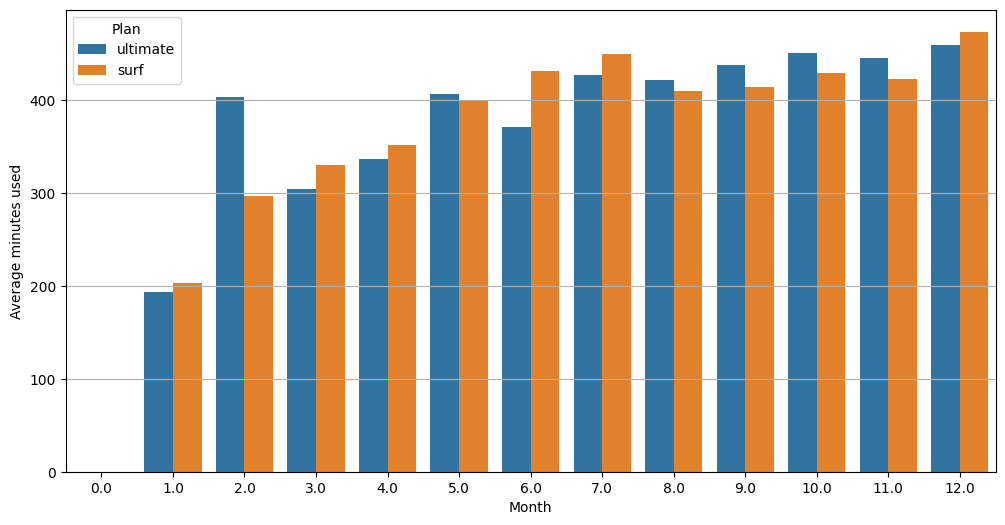

In [210]:
#Graficar la duración promedio de llamadas por plan y mes
plt.figure(figsize=(12, 6))
sns.barplot(data=int_fact_plans, x='month', y='avg_minutes_used', hue='plan', ci=None)
plt.xlabel('Month')
plt.ylabel('Average minutes used')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.show()

En el grafico la duracion promedio de llamadas no se podria decir que alguno de los planes tuvo mayor predominio ambos tienen pico asi que se comentara por mes
a) En enero predomina ligeramente el plan surf se puede deber a que en enero la mayoria de clientes estan mas gastados y se ocupa mejor este plan
b) En febrero nos muestra una notorio predominio en el plan ultimate sobre el surf se puede deber a un sin fin de razones se podria hacer una encuesta para saber porque los clientes prefieren usar este plan este mes
c) En marzo y abril un predominio del plan surf pero muy ligera la diferencia
d) En mayo algo parejo en mabos planes pero mayor preferencia del plan ultimate
f)junio y julio predominio del plan surf se puede deber a que son meses son de vacaciones pudo haber mayor demanda del plan
g)agosto a noviembre predominio total del plan ultimate
h) diciembre predominio del plan surf en general se puede decir que demanda de ambos planes pero varia mucho se puede deber a muchas razones que el departamento de marketing tiene la tarea de descubrir

In [211]:
# Compara el numero de llamadas promedio  por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
int_fact_plans['avg_total_calls'] = int_fact_plans.groupby(['plan', 'month'])['total_calls'].transform('mean')


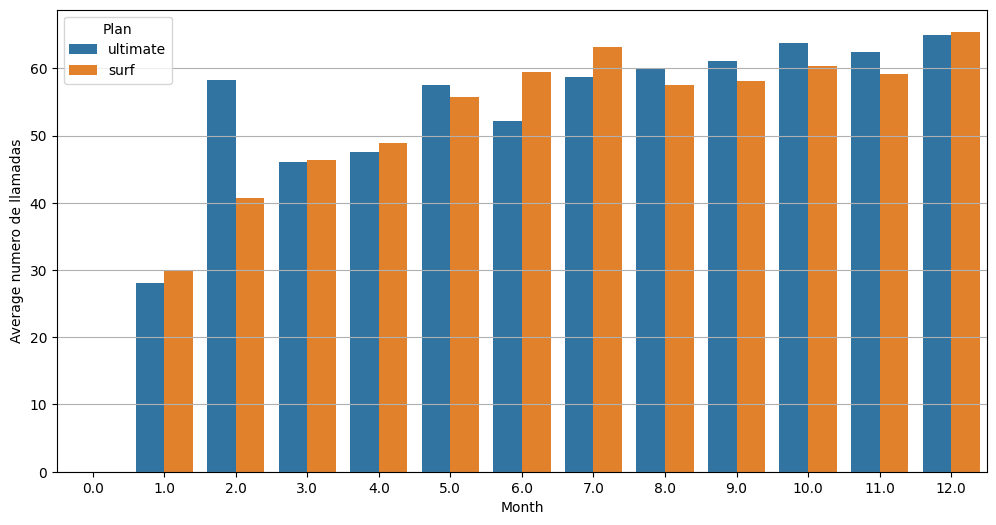

In [212]:
#Graficar el numero de llamadas promedio  por plan y mes
plt.figure(figsize=(12, 6))
sns.barplot(data=int_fact_plans, x='month', y='avg_total_calls', hue='plan', ci=None)
plt.xlabel('Month')
plt.ylabel('Average numero de llamadas')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.show()

El grafico en base al mumero de llamadas al mes se puede inferir que en general hay una demanda un numero considerable para ambos planes solo en dos meses en especial la diferencia fue notoria

In [213]:
int_fact_plans['total_minutes_used'] = int_fact_plans.groupby(['plan', 'month'])['minutes_used'].transform('sum')



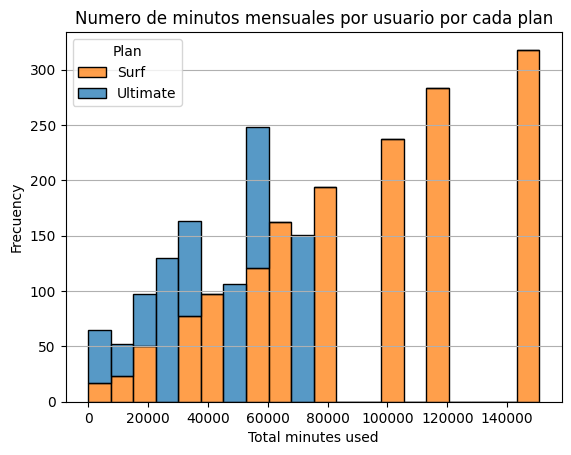

In [214]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sns.histplot(data=int_fact_plans, x='total_minutes_used', hue='plan', multiple='stack', bins=20)
plt.title('Numero de minutos mensuales por usuario por cada plan')
plt.xlabel('Total minutes used')
plt.ylabel('Frecuency')
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])
plt.grid(axis='y')
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [215]:
# Calcula la media y la varianza de la duración mensual de llamadas.
int_fact_plans['variance_monthly_call']= int_fact_plans.groupby('month')['minutes_used'].transform('var')
int_fact_plans['variance_monthly_call']




0       63180.258670
1       54351.738142
2       63180.258670
3       52829.190527
4       54351.738142
            ...     
2298        0.000000
2299        0.000000
2300        0.000000
2301        0.000000
2302        0.000000
Name: variance_monthly_call, Length: 2303, dtype: float64

In [216]:
#Calcula la media y la varianza de la duracion de llamadas por plan
mean_call_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['minutes_used'].mean()
mean_call_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['minutes_used'].mean()
median_call_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['minutes_used'].median()
var_call_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['minutes_used'].var()
var_call_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['minutes_used'].var()
median_call_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['minutes_used'].median()
int_fact_plans['mean_minutes_used'] = int_fact_plans['plan'].map({
    'surf': mean_call_surf,
    'ultimate': mean_call_ultimate
    })
int_fact_plans['variance_minutes_used'] = int_fact_plans['plan'].map({
    'surf': var_call_surf,
    'ultimate': var_call_ultimate
})
int_fact_plans['median_minutes_used'] = int_fact_plans['plan'].map({
    'surf': median_call_surf,
    'ultimate': median_call_ultimate
})
int_fact_plans.reset_index(drop=True, inplace=True)
print(int_fact_plans[['plan', 'mean_minutes_used', 'variance_minutes_used', 'median_minutes_used']].drop_duplicates())

         plan  mean_minutes_used  variance_minutes_used  median_minutes_used
0    ultimate         428.071823           58543.878652                421.5
724      surf         427.120329           55455.577400                424.0


In [217]:
#Calcula la media y la varianza del numero total  de llamadas al mes
int_fact_plans['variance_monthly_total_call']= int_fact_plans.groupby('month')['total_calls'].transform('var')
int_fact_plans['variance_monthly_total_call']
int_fact_plans['avg_monthly_total_call'] = int_fact_plans.groupby(['plan', 'month'])['total_calls'].transform('sum')
int_fact_plans['avg_monthly_total_call']

0       9800.0
1       7920.0
2       9800.0
3       6761.0
4       7920.0
         ...  
2298       0.0
2299       0.0
2300       0.0
2301       0.0
2302       0.0
Name: avg_monthly_total_call, Length: 2303, dtype: float64

In [218]:
#Calcula la media y la varianza del numero de llamadas por plan
mean_total_call_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['total_calls'].mean()
mean_total_call_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['total_calls'].mean()
median_total_call_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['total_calls'].median()
var_total_call_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['total_calls'].var()
var_total_call_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['total_calls'].var()
median_total_call_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['total_calls'].median()
int_fact_plans['mean_total_calls'] = int_fact_plans['plan'].map({
    'surf': mean_total_call_surf,
    'ultimate': mean_total_call_ultimate
    })
int_fact_plans['variance_total_calls'] = int_fact_plans['plan'].map({
    'surf': var_total_call_surf,
    'ultimate': var_total_call_ultimate
})
int_fact_plans['median_total_calls'] = int_fact_plans['plan'].map({
    'surf': median_total_call_surf,
    'ultimate': median_total_call_ultimate
})
int_fact_plans.reset_index(drop=True, inplace=True)
print(int_fact_plans[['plan', 'mean_total_calls', 'variance_total_calls', 'median_total_calls']].drop_duplicates())

         plan  mean_total_calls  variance_total_calls  median_total_calls
0    ultimate         60.291436           1119.205404                61.0
724      surf         59.584547           1034.804476                60.0


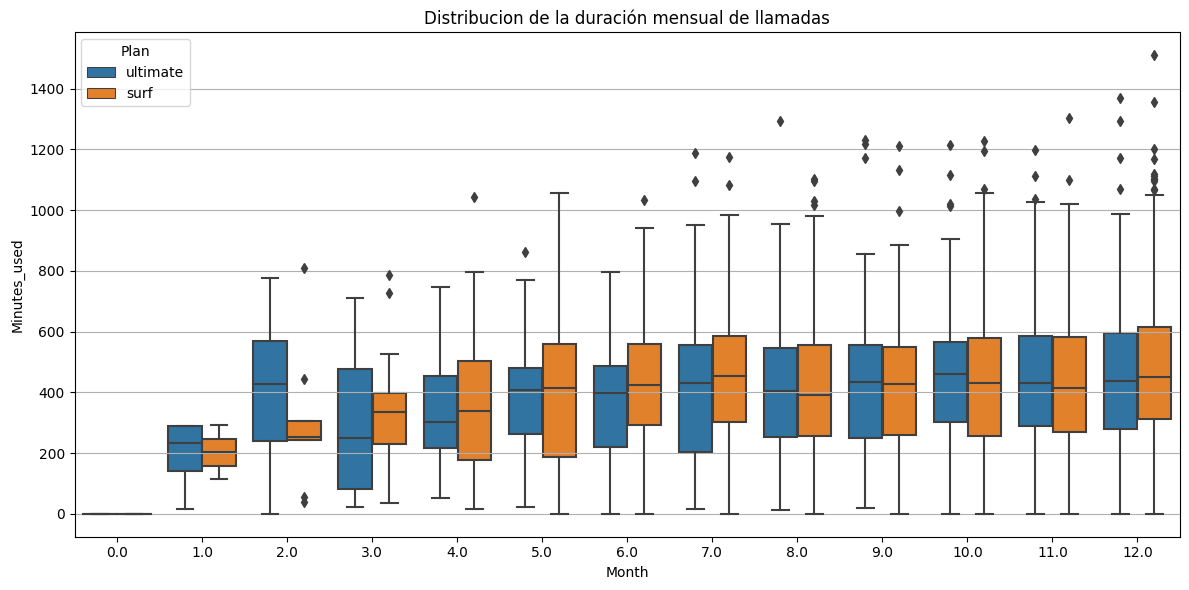

In [219]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 6))
sns.boxplot(data= int_fact_plans, x='month', y='minutes_used', hue='plan')
plt.title('Distribucion de la duración mensual de llamadas')
plt.xlabel('Month')
plt.ylabel('Minutes_used')
plt.grid(axis='y')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

Explicacion del diagrama de caja y bigote 
Es igual de notorio en este grafico la gran variacion en el uso de minutos nos muestra que nunca fue estable de hecho apartir de julio hasta diciembre hay mas presencia de valores atipicos pero lo importante a destacar es que esos meses hay mas semejanza en los planes en valore de mediana y los valores de Q1 y Q3 donde se presenta la variacion es en los valores iniciales y finales en cuanto al uso de minutos

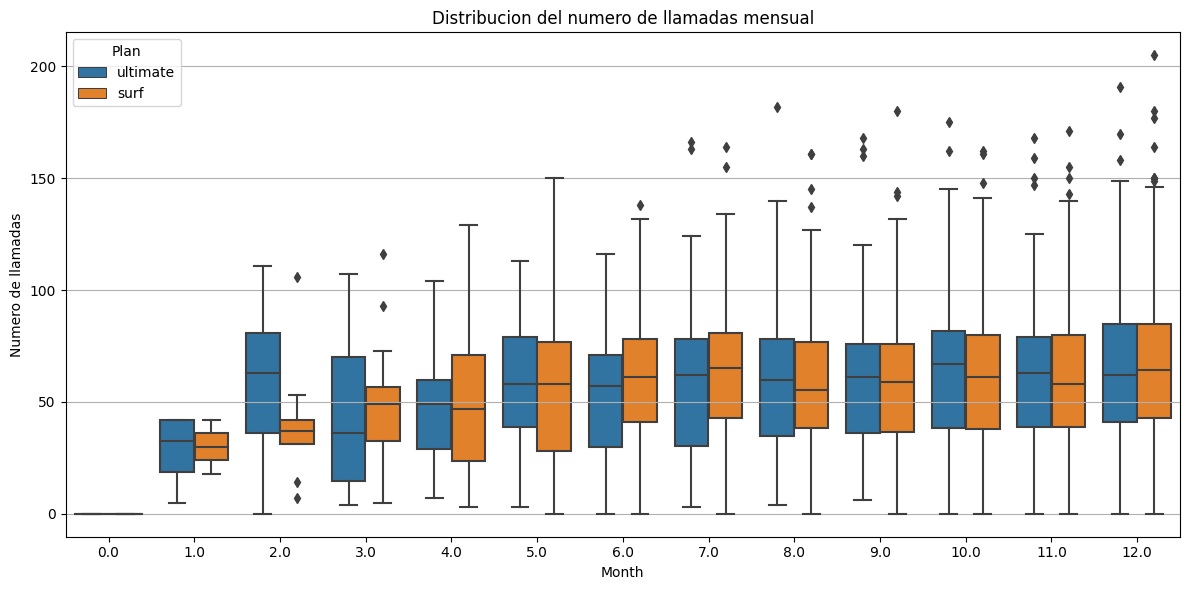

In [220]:
# Traza un diagrama de caja para visualizar la distribución del numero de llamadas mensual
plt.figure(figsize=(12, 6))
sns.boxplot(data= int_fact_plans, x='month', y='total_calls', hue='plan')
plt.title('Distribucion del numero de llamadas mensual')
plt.xlabel('Month')
plt.ylabel('Numero de llamadas')
plt.grid(axis='y')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

La distribucion del numero llamadas en la mayoria de las caja la mediana presenta un sesgo ya sea ala izquierda o derecha donde nos dice que no hay siemtria, incremento de valores atipicos del mes de julio-diciembre

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

In [221]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
int_fact_plans['total_messages_plan'] = int_fact_plans.groupby(['month', 'plan'])['total_messages'].transform('sum')



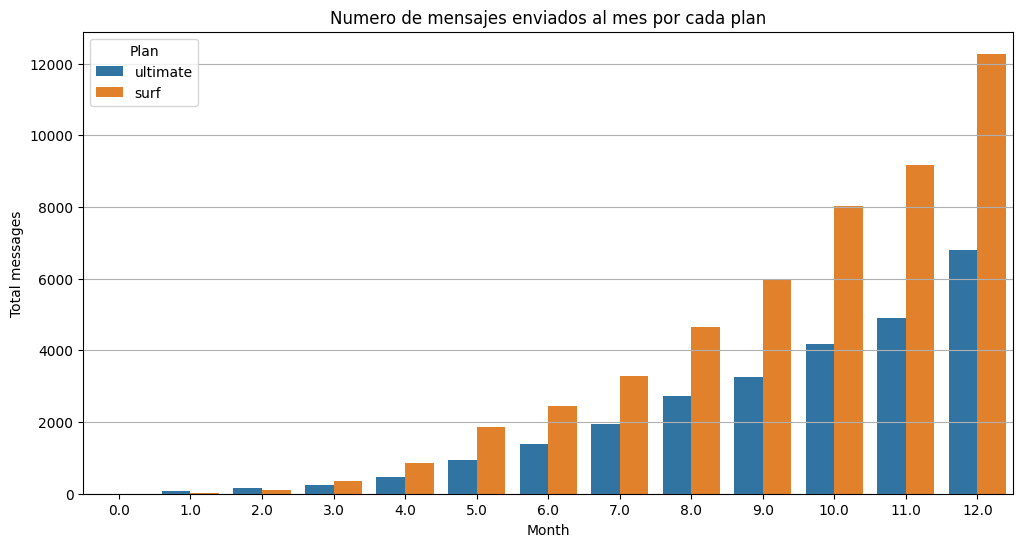

In [222]:
plt.figure(figsize=(12, 6))
sns.barplot(data=int_fact_plans, x='month', y='total_messages_plan', hue='plan')
plt.title('Numero de mensajes enviados al mes por cada plan')
plt.xlabel('Month')
plt.ylabel('Total messages')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.show()

Un grafico donde el numero de mensajes enviados en el plan surf tuvo un crecimiento exponecial al igual que ultimate pero con mayor numero de mensaje, donde es punto  a considerar que pueden hacer para que los primeros cinco meses haya mayor aumento en cuanto a mensajes que estrategias aplicar

In [223]:
#Calcula la media y la varianza del numero de mensajes que envian cada mes los usuarios.
int_fact_plans['avg_monthly_messages'] = int_fact_plans.groupby('month')['total_messages'].transform('mean')
int_fact_plans['variance_monthly_messages'] = int_fact_plans.groupby('month')['total_messages'].transform('var')
print(int_fact_plans['variance_monthly_messages'] )



0       1493.270880
1       1122.582003
2       1493.270880
3       1261.771930
4       1122.582003
           ...     
2298       0.000000
2299       0.000000
2300       0.000000
2301       0.000000
2302       0.000000
Name: variance_monthly_messages, Length: 2303, dtype: float64


In [224]:
# Calcula la media y la varianza del número de mensajes por plan
mean_messages_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['total_messages'].mean()
mean_messages_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['total_messages'].mean()
median_messages_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['total_messages'].median()
median_messages_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['total_messages'].median()
var_messages_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['total_messages'].var()
var_messages_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['total_messages'].var()


int_fact_plans['mean_total_messages'] = int_fact_plans['plan'].map({
    'surf': mean_messages_surf,
    'ultimate': mean_messages_ultimate
})

int_fact_plans['variance_total_messages'] = int_fact_plans['plan'].map({
    'surf': var_messages_surf,
    'ultimate': var_messages_ultimate
})

int_fact_plans['median_total_messages'] = int_fact_plans['plan'].map({
    'surf': median_messages_surf,
    'ultimate': median_messages_ultimate
})


int_fact_plans.reset_index(drop=True, inplace=True)


print(int_fact_plans[['plan', 'mean_total_messages', 'variance_total_messages', 'median_total_messages']].drop_duplicates())


         plan  mean_total_messages  variance_total_messages  \
0    ultimate            37.343923              1209.827612   
724      surf            31.041165              1126.118076   

     median_total_messages  
0                     30.0  
724                   24.0  


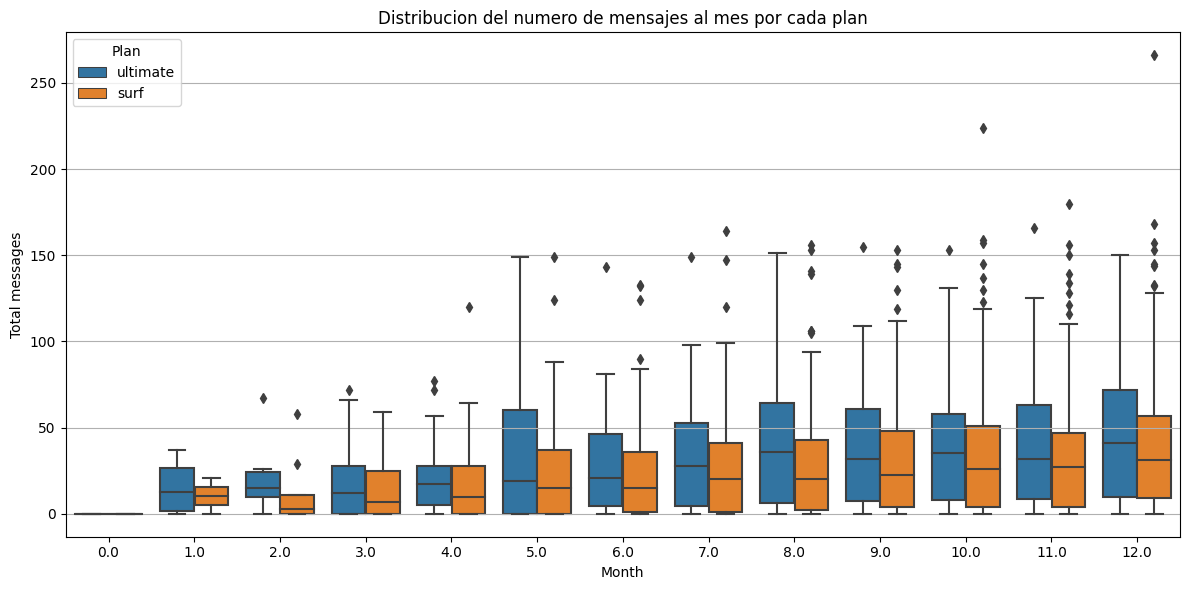

In [225]:
#Traza un diagrama de caja y bigotes para visualizar  la distribucion del numero de mensajes cada mes y por plan
plt.figure(figsize=(12, 6))
sns.boxplot(data= int_fact_plans, x='month', y='total_messages', hue= 'plan')
plt.title('Distribucion del numero de mensajes al mes por cada plan')
plt.xlabel('Month')
plt.ylabel('Total messages')
plt.grid(axis='y')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


Se nota mayor simetria en la caja donde no se presenta sesgo, apartir del quinto mes aumenta la presencia de avalores atipicos, y una estabilidad ligera donde el plan ultimate en los meses de octubre a diciembre fueron mayores en cuanto a mensajes totales contra el plan surf

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [226]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan y por mes 
int_fact_plans['internet_consumed_user'] = int_fact_plans.groupby(['month', 'plan'])['gb_used_user_rounded'].transform('sum')




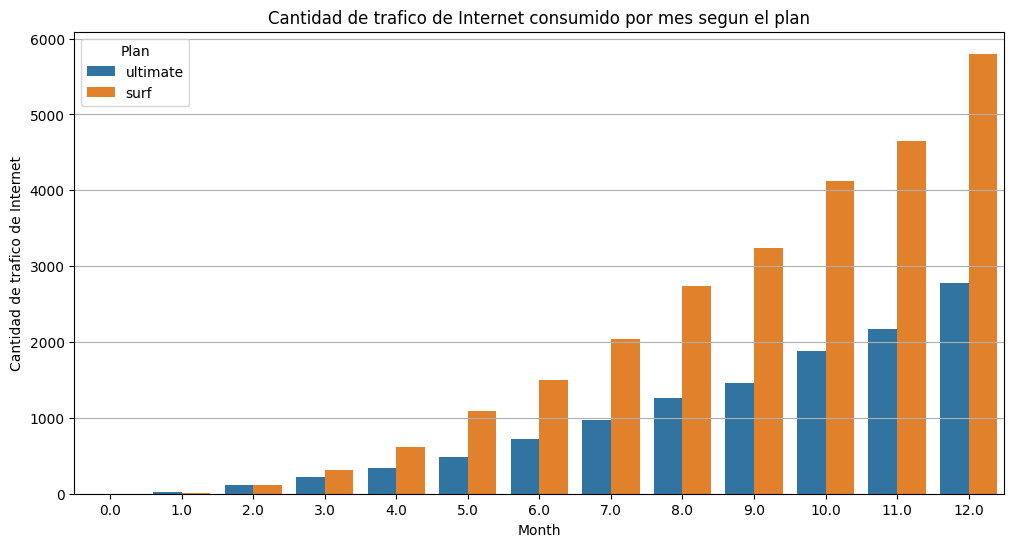

In [227]:
plt.figure(figsize=(12, 6))
sns.barplot(data=int_fact_plans, x='month', y='internet_consumed_user', hue='plan')
plt.title('Cantidad de trafico de Internet consumido por mes segun el plan')
plt.xlabel('Month')
plt.ylabel('Cantidad de trafico de Internet')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.show()

Un crecimiento exponencial positivo para la organizacion de la cantidad de gigabytes usados por plan donde el plan surf fue superior al plan ultimate al ver los paquetes es mas barato el plan surf en cuanto al consumo de gb por eso la preferencia de los clientes a costear algo mas que caro que tal vez no usen tanto o creen excederce de su limite

In [228]:
#Calcula la media y la varianza la cantidad de tráfico de Internet consumido por usuarios al mes.
int_fact_plans['avg_monthly_internet'] = int_fact_plans.groupby('month')['gb_used_user_rounded'].transform('mean')
print(int_fact_plans['avg_monthly_internet'])
print()
int_fact_plans['variance_monthly_intenet'] = int_fact_plans.groupby('month')['gb_used_user_rounded'].transform('mean')
print(int_fact_plans['variance_monthly_intenet'])


0       18.289979
1       16.643902
2       18.289979
3       17.504373
4       16.643902
          ...    
2298     0.000000
2299     0.000000
2300     0.000000
2301     0.000000
2302     0.000000
Name: avg_monthly_internet, Length: 2303, dtype: float64

0       18.289979
1       16.643902
2       18.289979
3       17.504373
4       16.643902
          ...    
2298     0.000000
2299     0.000000
2300     0.000000
2301     0.000000
2302     0.000000
Name: variance_monthly_intenet, Length: 2303, dtype: float64


In [229]:
#Calcula la media y la varianza la cantidad de tráfico de Internet consumido por usuarios por plan
mean_internet_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['gb_used_user_rounded'].mean()
mean_internet_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['gb_used_user_rounded'].mean()
median_internet_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['gb_used_user_rounded'].median()
var_internet_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['gb_used_user_rounded'].var()
var_internet_ultimate = int_fact_plans[int_fact_plans['plan'] == 'ultimate']['gb_used_user_rounded'].var()
median_internet_surf = int_fact_plans[int_fact_plans['plan'] == 'surf']['gb_used_user_rounded'].median()
int_fact_plans['mean_internet_consumed'] = int_fact_plans['plan'].map({
    'surf': mean_internet_surf,
    'ultimate': mean_internet_ultimate
    })
int_fact_plans['variance_internet_consumed'] = int_fact_plans['plan'].map({
    'surf': var_internet_surf,
    'ultimate': var_internet_ultimate
})
int_fact_plans['median_internet_consumed'] = int_fact_plans['plan'].map({
    'surf': median_internet_surf,
    'ultimate': median_internet_ultimate
})
int_fact_plans.reset_index(drop=True, inplace=True)
print(int_fact_plans[['plan', 'mean_internet_consumed', 'variance_internet_consumed', 'median_internet_consumed']].drop_duplicates())

         plan  mean_internet_consumed  variance_internet_consumed  \
0    ultimate               17.211326                   60.153067   
724      surf               16.607346                   62.402126   

     median_internet_consumed  
0                        17.0  
724                      17.0  


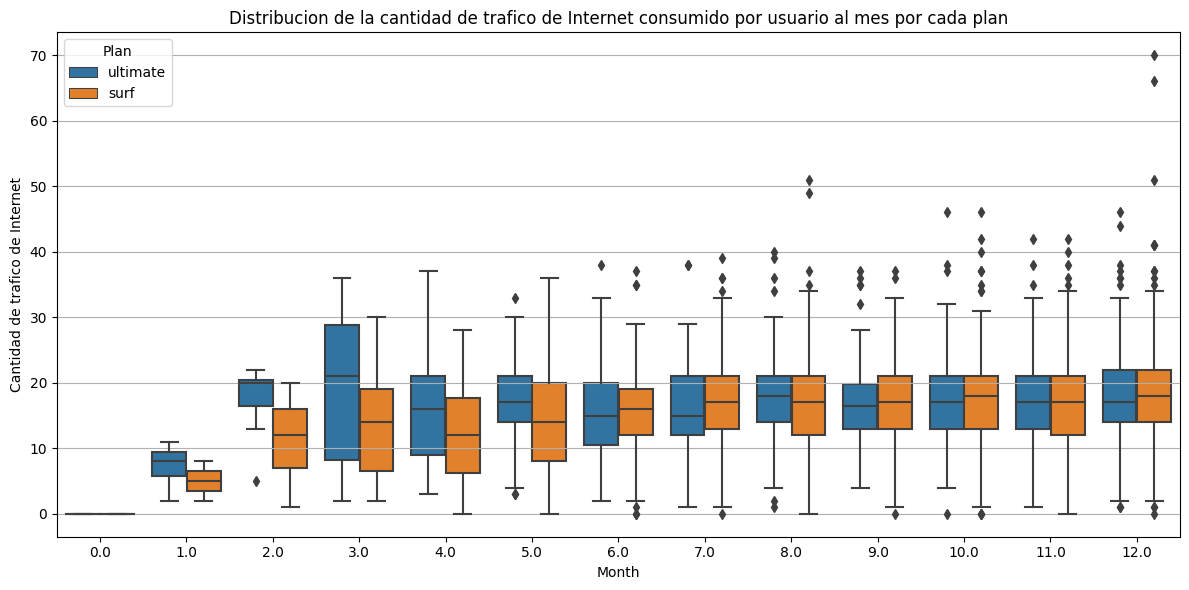

In [230]:
#Traza un diagrama de caja y bigotes para visualizar  la distribucion de la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(12, 6))
sns.boxplot(data= int_fact_plans, x='month', y='gb_used_user_rounded', hue= 'plan')
plt.title('Distribucion de la cantidad de trafico de Internet consumido por usuario al mes por cada plan')
plt.xlabel('Month')
plt.ylabel('Cantidad de trafico de Internet')
plt.grid(axis='y')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


En cuanto a la cantidad de gb consumido por plan existe gran varacion entre los meses, donde de igual froma de meses de julio-diciembre hay gran variabilidad en los datos se deberia estudiar a que se deben siempre en los mismo meses del año

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [231]:
int_fact_plans['avg_monthly_income'] = int_fact_plans.groupby('plan')['monthly_income'].transform('mean')
int_fact_plans['variance_monthly_income'] = int_fact_plans.groupby('plan')['monthly_income'].transform('var')
print(int_fact_plans['avg_monthly_income'] )
print()
print(int_fact_plans['variance_monthly_income'])


0       72.301105
1       72.301105
2       72.301105
3       72.301105
4       72.301105
          ...    
2298    60.551729
2299    60.551729
2300    60.551729
2301    60.551729
2302    60.551729
Name: avg_monthly_income, Length: 2303, dtype: float64

0        129.159556
1        129.159556
2        129.159556
3        129.159556
4        129.159556
           ...     
2298    3062.446864
2299    3062.446864
2300    3062.446864
2301    3062.446864
2302    3062.446864
Name: variance_monthly_income, Length: 2303, dtype: float64


In [232]:
int_fact_plans['median_monthly_income'] = int_fact_plans.groupby('plan')['monthly_income'].transform('median')
print(int_fact_plans['median_monthly_income'])
print()
int_fact_plans['std_dev_monthly_income'] = int_fact_plans.groupby('plan')['monthly_income'].transform('std')
print(int_fact_plans['std_dev_monthly_income'])


0       70.00
1       70.00
2       70.00
3       70.00
4       70.00
        ...  
2298    40.18
2299    40.18
2300    40.18
2301    40.18
2302    40.18
Name: median_monthly_income, Length: 2303, dtype: float64

0       11.364839
1       11.364839
2       11.364839
3       11.364839
4       11.364839
          ...    
2298    55.339379
2299    55.339379
2300    55.339379
2301    55.339379
2302    55.339379
Name: std_dev_monthly_income, Length: 2303, dtype: float64


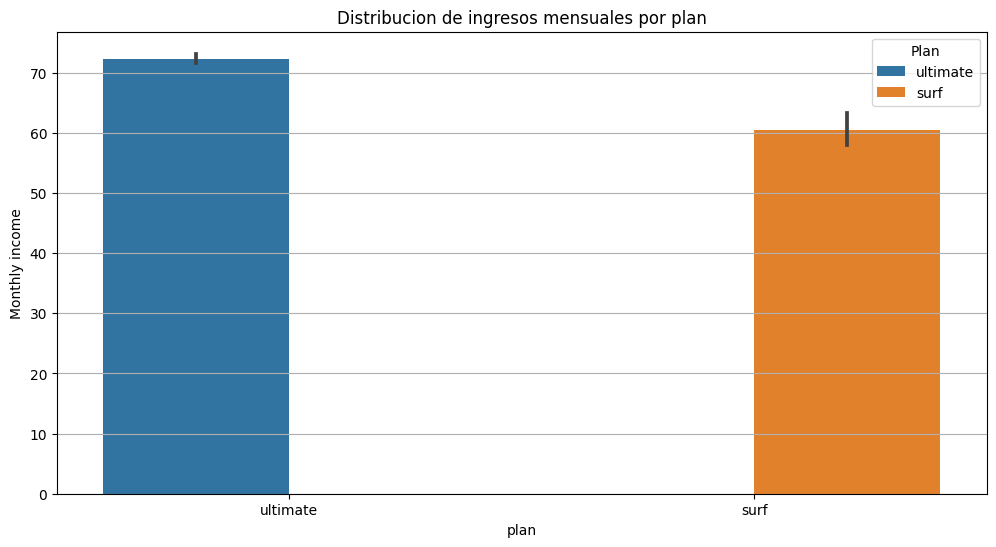

In [233]:
plt.figure(figsize=(12, 6))
sns.barplot(data=int_fact_plans, x='plan', y='monthly_income', hue='plan')
plt.title('Distribucion de ingresos mensuales por plan')
plt.xlabel('plan')
plt.ylabel('Monthly income')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.show()

El grafico nos indica que el plan que genera mayores ingresos a esta emoresa de telecomunicaciones es el plan ultimate se puede deber aunque es mas costoso puede que genere mas o tenga mayores clientes porque el plan es atractivo en a costo de te pasas del limite ya sea de llamadas, mensajes e internet.

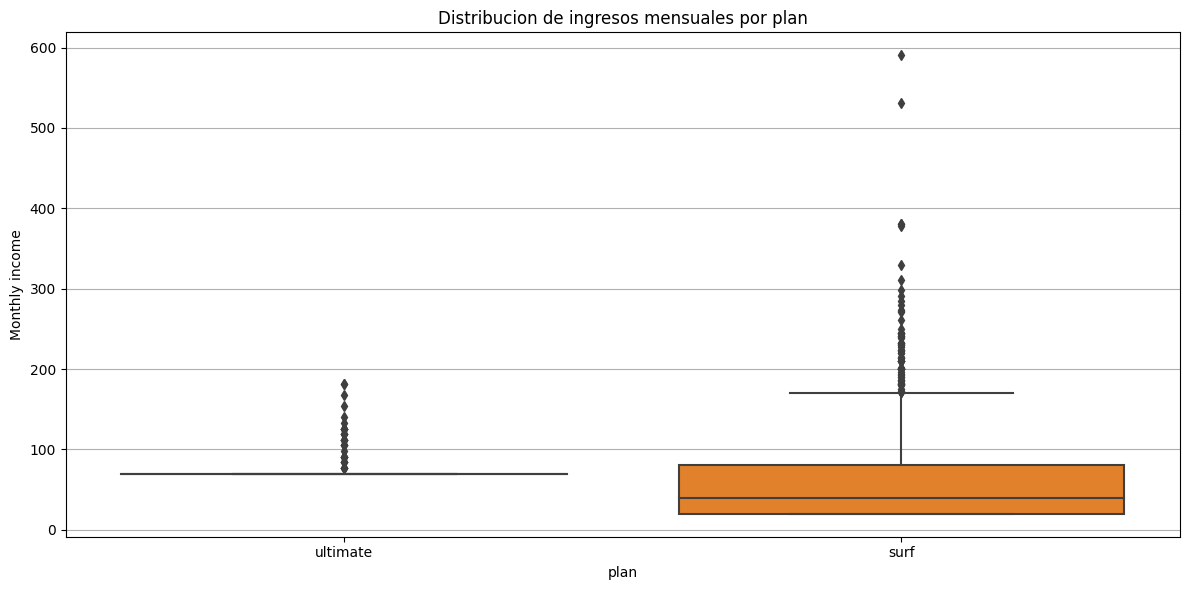

In [234]:
#Traza un diagrama de caja y bigotes para visualizar  la distribucion de la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(12, 6))
sns.boxplot(data= int_fact_plans, x='plan', y='monthly_income')
plt.title('Distribucion de ingresos mensuales por plan')
plt.xlabel('plan')
plt.ylabel('Monthly income')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


El grafico no nos muestra demasiado ya que el plan ultimate no nos muestra informacion que nos ayude a inferer que plan genera mayores ingresos por eso de apoyo esta el grafico de barras que nos ayuda visualmente a poder llegar a una conclusion mas fiable 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [235]:
print(int_fact_plans.query('plan == "surf"')['monthly_income'].mean())
print(int_fact_plans.query('plan == "surf"')['monthly_income'].var())
print(int_fact_plans.query('plan == "ultimate"')['monthly_income'].mean())
print(int_fact_plans.query('plan == "ultimate"')['monthly_income'].var())

60.551728942368584
3062.4468636121587
72.3011049723757
129.15955617707067


H1 : El ingreso promedio de surf es mayor que el ingreso promedio de ultimate
H0 : El ingreso promedio de surf no es mayor que el ingreso promedio de ultimate

In [236]:
# Prueba las hipótesis

surf_income = int_fact_plans.query('plan == "surf"')['monthly_income']
ultimate_income = int_fact_plans.query('plan == "ultimate"')['monthly_income']
alpha = 0.05
results_income = st.ttest_ind(surf_income, ultimate_income, equal_var=False )
print('valor de p:', results_income.pvalue)
if (results_income.pvalue < alpha):
     print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


valor de p: 1.218411585212325e-15
Rechazamos la hipótesis nula


Se tiene un 95% de confianza que el plan surf genera mayores ingresos mensuales que el plan ultimate, aunque la media nos dice que ultimate es mayor se comprobo mediante estadistica inferencial que no es asi

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H1 : El ingreso promedio de los usuarios de area  NY-NJ es diferente al ingreso promedio de otras regiones
H0 : El ingreso promedio de los usuarios de area  NY-NJ no es diferente al ingreso promedio de otras regiones
    

In [237]:
# Prueba las hipótesis
ny_nj_income = int_fact_plans[int_fact_plans['city'].str.contains('NY-NJ-PA')]['monthly_income']
other_city_income = int_fact_plans[~int_fact_plans['city'].str.contains('NY-NJ-PA')]['monthly_income']
var_ny_nj = ny_nj_income.var()
print(var_ny_nj)
var_other = other_city_income.var()
print(var_other)
alpha = 0.05
results_city_income = st.ttest_ind(ny_nj_income,other_city_income, equal_var=False )
print('valor de p:', results_city_income.pvalue)
if (results_city_income.pvalue < alpha):
     print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

1890.7864451244156
2221.035164632287
valor de p: 0.03870322661292962
Rechazamos la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Un proceso paso a paso sobre lo que nos quieren decir los datos en este caso de la empresa de telecomunicaciones Megaline para poder saber que plan genera mas ingresos fue el plan surf los clientes solo requieren un plan basico de llamadas, mensajes e internet ver que tipo de clientes los consumen si estudiantes, comerciantes, empresarios dependiendo de sus necesades requeriran un plan que se adapte a sus necesidades. los pasos a seguir fueron:
a)Cargar los dataframes(haciendo sus debidas correciones)
b)Analizar la informacion de los DF haciendo los cambios necesarios para mejor manipulacion
c)Creacion de un tabla intermedia de hechos que nos muestre solo los datos que necesito
d)El uso de graficos que nos ayuden a observan que plan usa mas minutos, consumes mas internet y hace mas mensajes aplicando estaditica descriptiva; al igual que plan genera mas ingresos mensuales
e) Aplicar estadistica inferencial finalmente para dar una conclusion final y ver todas mejores se pueden hacer como promociones, descuentos, encuestas mas en los meses mas bajos que son a principio de año e invertir en esos puntos debiles de la organizacion.